## Propulsion Academy Data Science curriculum

In [4]:
## Lets load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from datetime import datetime
%matplotlib inline
## Create the date column
reviews_df = pd.read_csv("ign.csv")

## Let's desribe the data

In [5]:
reviews_df.describe()

,Unnamed: 0,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.000000,18625.00000,18625.000000
mean,9312.000000,6.950459,2006.515329,7.13847,15.603866
std,5376.718717,1.711736,4.587529,3.47671,8.690128
min,0.000000,0.500000,1970.000000,1.00000,1.000000
25%,4656.000000,6.000000,2003.000000,4.00000,8.000000
50%,9312.000000,7.300000,2007.000000,8.00000,16.000000
75%,13968.000000,8.200000,2010.000000,10.00000,23.000000
max,18624.000000,10.000000,2016.000000,12.00000,31.000000


In [6]:
reviews_df.index

RangeIndex(start=0, stop=18625, step=1)

#### plotting distribution of different scores

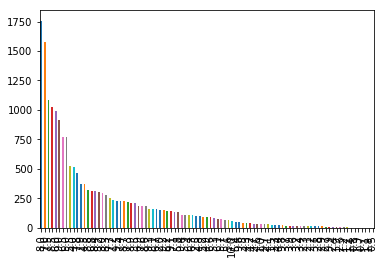

In [7]:
reviews_df['score'].value_counts().plot(kind = "bar")

## Same plot as above but without sorting

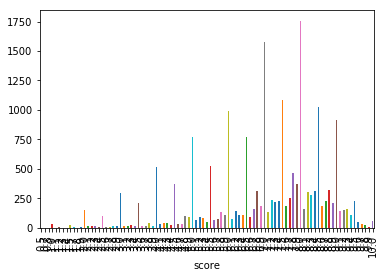

In [8]:
reviews_cnts = reviews_df.groupby(['score']).size()
reviews_cnts.plot.bar()

## Score_phrase counts

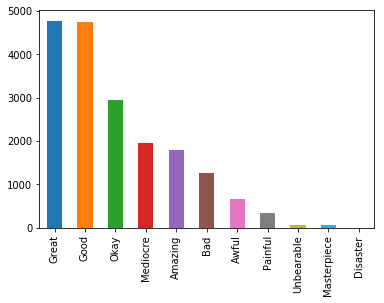

In [9]:
reviews_df['score_phrase'].value_counts().plot(kind = "bar")

## Number of reviews across plotforms

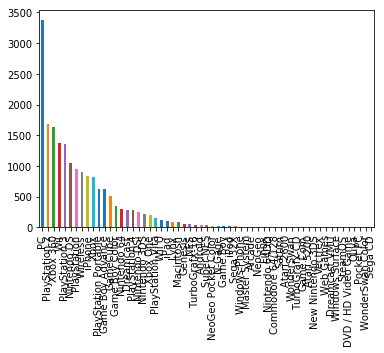

In [10]:
reviews_df['platform'].value_counts().plot(kind = "bar")

## Boxplot of genre vs score

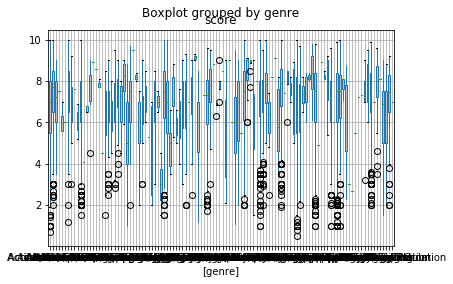

In [11]:
reviews_df[['genre','score']].boxplot(by='genre')

## Boxplot of platform vs score

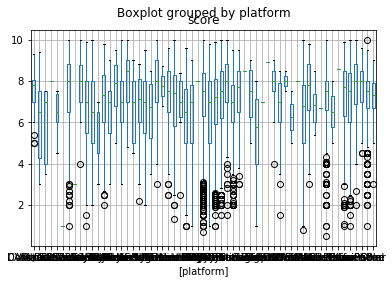

In [12]:
reviews_df[['platform','score']].boxplot(by='platform')

## Examples of subsetting the data across multiple columns

In [13]:
df_subset = reviews_df[(reviews_df['platform'] == "PlayStation 4") & (reviews_df['editors_choice'] == "N")]
df_subset.head(2)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17185,17185,Great,Final Fantasy XIV Online: A Realm Reborn,/games/final-fantasy-xiv-online/ps4-20000637,PlayStation 4,8.6,RPG,N,2013,9,11
17224,17224,Good,Outlast,/games/outlast/ps4-20000780,PlayStation 4,7.8,"Action, Adventure",N,2013,9,4


## Let's now compare Xbox one and PlayStation 4

In [14]:
df_subset = reviews_df[reviews_df['platform'].isin(["Xbox One","PlayStation 4"])]
df_subset.head(2)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
192,192,Amazing,Sound Shapes,/games/sound-shapes-queasy-games/ps4-20007461,PlayStation 4,9.0,Platformer,Y,2012,8,8
17049,17049,Amazing,Fez,/games/fez/ps4-20004218,PlayStation 4,9.5,Platformer,Y,2013,5,1


## Let's now make a box plot of scores for selected platforms

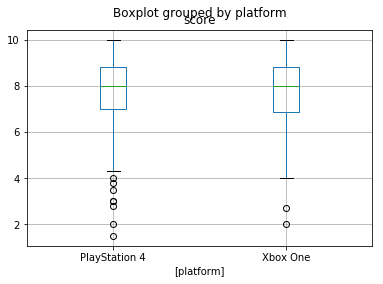

In [15]:
df_subset[['platform','score']].boxplot(by='platform')

## Lets count the number of editors choice in these 2 platforms

In [16]:
group_cnts = df_subset.groupby(['platform','editors_choice']).size()

In [17]:
group_cnts = group_cnts.unstack(level = 1)
group_cnts

editors_choice,N,Y
platform,,
PlayStation 4,215,62
Xbox One,165,43


## Lets make the stacked barplot now

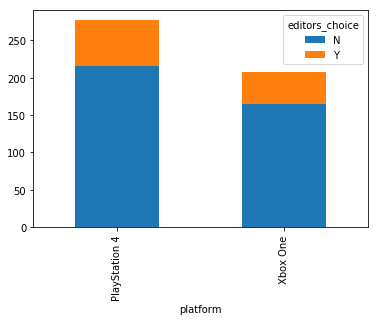

In [18]:
group_cnts.plot.bar(stacked = True)

## Making the correlation plot of numeric variables

In [19]:
corr = reviews_df.corr()

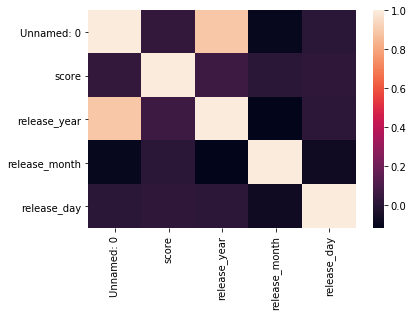

In [20]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)